## Notebook 1: Partial Correlations
Numerical example to visualize the concepts of linear conditional independence testing, explained on section 3.1.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

We have a random variable Z and a linear data generating process as 
X <- Z -> Y   (chosen constants are arbritary values)

In [2]:
Z =  np.random.randn(100)
X = 4.3*Z + np.random.randn(100) + 2.3
Y = -7.2*Z + np.random.randn(100)

First, variables X and Y seam linearly correlated, due to its common cause Z:

Pearson Correlation Coefficient: -0.964873533954139
P-value: 1.0713007437128651e-58


Text(0, 0.5, 'Y')

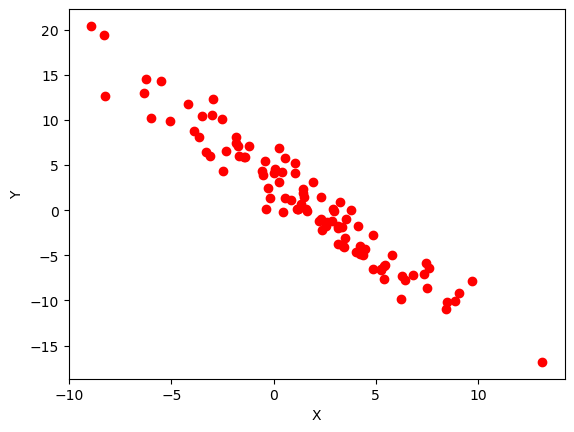

In [3]:
correlation_coefficient, p_value = pearsonr(X, Y)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.plot(X,Y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')

First step is fitting a linear regression model X = f(Z) in order to unveil how much information on X can be explained by Z:

In [4]:
model = LinearRegression()
Z = np.array(Z).reshape(-1, 1)
model.fit(Z, X)
predictions = model.predict(Z)
residualsX = X - predictions

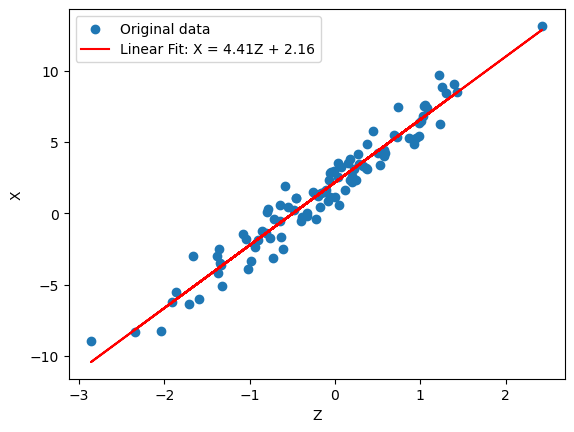

In [5]:
slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(Z, X, label='Original data')

# Plot the linear regression fit
plt.plot(Z, predictions, color='red', label=f'Linear Fit: X = {slope:.2f}Z + {intercept:.2f}')

# Add labels and a legend
plt.xlabel('Z')
plt.ylabel('X')
plt.legend()

We do the same with Y = f(Z):

In [6]:
model = LinearRegression()
model.fit(Z, Y)
predictions = model.predict(Z)
residualsY = Y - predictions

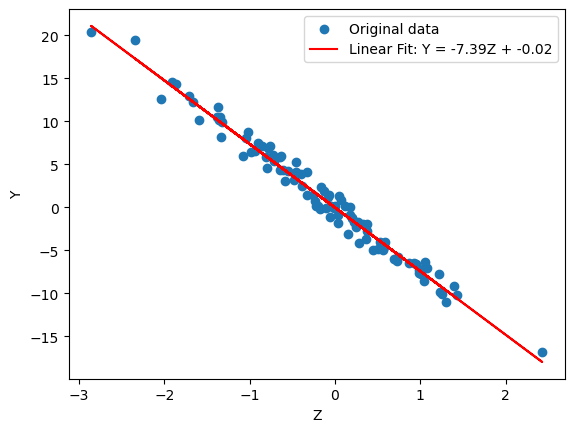

In [7]:
slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(Z, Y, label='Original data')

# Plot the linear regression fit
plt.plot(Z, predictions, color='red', label=f'Linear Fit: Y = {slope:.2f}Z + {intercept:.2f}')

# Add labels and a legend
plt.xlabel('Z')
plt.ylabel('Y')
plt.legend()

The Conditional Independence Test consists on computing the Pearson Correlation Coefficient between the residuals of these two regressions:

Pearson Correlation Coefficient: -0.049785045213058536
P-value: 0.6227925525069532


Text(0, 0.5, '$r_y$')

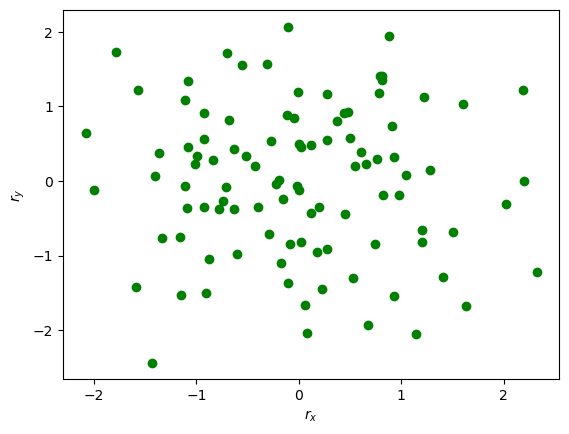

In [8]:
correlation_coefficient, p_value = pearsonr(residualsX, residualsY)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.plot(residualsX,residualsY, 'go')
plt.xlabel('$r_x$')
plt.ylabel('$r_y$')

We showed that X and Y are independent given Z: there is no relation between X and Y that cannot be explained by Z. 